In [18]:
%%capture
!pip install ipython-autotime
%load_ext autotime

time: 38.4 s (started: 2021-12-10 13:20:10 +02:00)


In [19]:
# Import libraries required

import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

time: 312 ms (started: 2021-12-10 13:20:49 +02:00)


In [20]:
df = pd.read_excel ('pone.0212445.s004.xlsx', header = 1)
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


time: 13 s (started: 2021-12-10 13:20:49 +02:00)


a)	What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [21]:
print(df[df.Estimate == 'Survey'].NoPLHIV.sum())

6409903
time: 547 ms (started: 2021-12-10 13:21:13 +02:00)


There is an estimated 6 409 903 total number people living with HIV in the listed districts.

In [22]:
df.shape

(104, 9)

time: 31 ms (started: 2021-12-10 13:21:19 +02:00)


b)	What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [23]:
print(df[df.District == 'Xhariep'].NoPLHIV.mean())

12247.5
time: 234 ms (started: 2021-12-10 13:21:29 +02:00)


c)	Add a column and populate it with the number of people not living with HIV for each row. 

In [24]:
df['HIVneg'] = round(df['NoPLHIV']/(df['Prevalence_%']/100))

time: 469 ms (started: 2021-12-10 13:21:32 +02:00)


In [25]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,HIVneg
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213.0
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753210.0
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596.0
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587.0
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,418593.0


time: 78 ms (started: 2021-12-10 13:22:10 +02:00)


d)	What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)? 

In [26]:
print(df[df.District.apply(lambda x: True if 'City' in x or 'Metro' in x else False)].NoPLHIV.sum())

2572733
time: 156 ms (started: 2021-12-10 13:22:16 +02:00)


3)	Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output. 

In [27]:
col_list = list()

regex = re.compile('[^a-zA-Z]')

for i in df.columns:
  col_list.append(regex.sub('', i))

print(col_list)

['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL', 'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL', 'HIVneg']
time: 0 ns (started: 2021-12-10 13:22:21 +02:00)


4)	Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph. 

In [28]:
df_fay = df[df.Estimate == 'Fay-Heriott']
fay_Di = df_fay[df_fay.District.apply(lambda x: x.endswith('i'))]
fay_Di_melted = pd.melt(fay_Di[['District','Prevalence_LCL','Prevalence_UCL']],
                        id_vars=['District'],
                        value_vars=['Prevalence_LCL', 'Prevalence_UCL'])

fay_Di_melted.head()

,District,variable,value
0,Chris Hani,Prevalence_LCL,11.181220
1,Joe Gqabi,Prevalence_LCL,9.291766
2,Fezile Dabi,Prevalence_LCL,7.811309
3,uMzinyathi,Prevalence_LCL,16.845087
4,Ehlanzeni,Prevalence_LCL,12.012425


time: 1.31 s (started: 2021-12-10 13:22:52 +02:00)


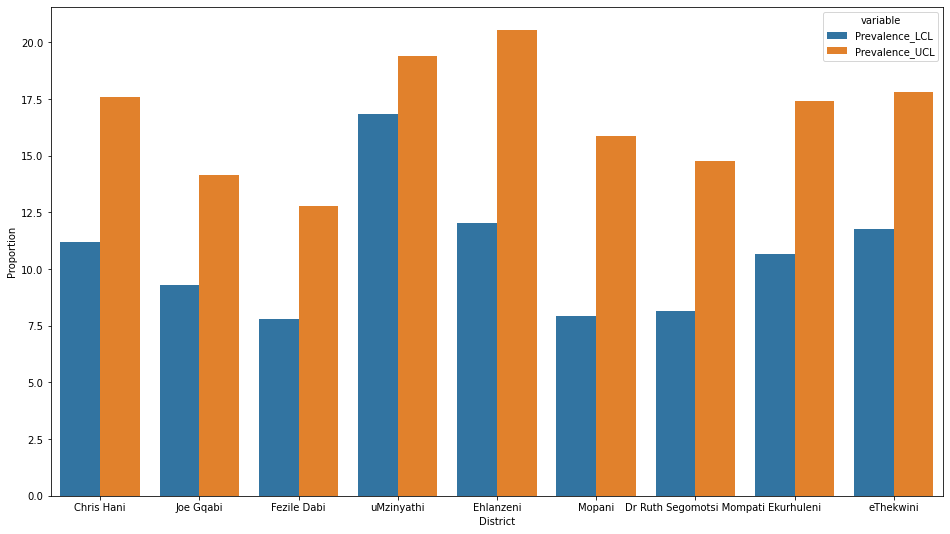

time: 2.05 s (started: 2021-12-10 13:22:53 +02:00)


In [29]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x="District", y="value", hue="variable", data=fay_Di_melted)
ax.set(ylabel='Proportion')
plt.show()